## Intro

### Installation

To get started with python, install Anaconda [python](https://www.anaconda.com/distribution/). This will come with many useful libraries for data analysis. Now if you're in **Windows**, open up an "Anaconda prompt" and you're good to go.

If you're in **Linux** you'll want to make sure that your `~/.bashrc` profile points to Anaconda python, not the built in python (so when you open a terminal you're all set). Add the following lines to your `~/.bashrc` file if it's not there already (where `<user>` is your username):
~~~
export PATH="/home/<user>/anaconda3/bin:$PATH"
conda activate
~~~

If you're in **Mac**, here are detailed [instructions](https://www.datacamp.com/community/tutorials/installing-anaconda-mac-os-x). It should work out of the box in a terminal, but if not you may need to modify your `.bash_profile` like in Linux.


### Packages and environments

Anaconda has a package manager [**conda**](https://conda.io/en/latest/) that you can use to install packages. Here is a good [tutorial](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html) if you want more info. To install a package say
~~~
conda install numpy
~~~
To upgrade to the latest version of a package say
~~~
conda install numpy --upgrade
~~~

Another package manager is `pip`, these are packages that are written only in python (see info [here](https://www.anaconda.com/understanding-conda-and-pip/)). Generally these will be packages that you find on github. I recommend using `conda` when available (e.g. for things like numpy or scikit-learn) because it makes sure that all dependencies are working. Dependencies are packages on which a package depends - most packages in data analysis will depend on the core packages like numpy and scipy.

conda also allows you to create different **environments** for your code. This is different from matlab. In python, there are many packages with different versions that aren't always backward compatible. Therefore, you may write code that might not work quite the same way in a year or so with the latest packages. However, all python packages have **version** control, so you can specifically install an older package with
~~~
pip install suite2p==0.5.5
~~~
or
~~~
conda install numpy==1.13.0
~~~

You may therefore want different environments for different code packages. To create and activate an environment, you can say
~~~
conda create -n cshl
conda activate cshl
~~~

Now you're in a new environment, you should see `(cshl)` on the left-hand side of your terminal. You can install packages here as you wish, and your `(base)` anaconda packages won't change. To see what packages are installed you can say
~~~
conda list
~~~

To close the environment, say
~~~
conda deactivate
~~~

Many packages that you might install from github come with `environment.yml` files to make an environment with the correct dependencies for you. Once in a folder which contains the `environment.yml`, run the following to name the environment `suite2p`:
~~~
conda env create -n suite2p
conda activate suite2p
~~~

### Jupyter notebooks

The `(base)` Anaconda environment will have `jupyter-notebook` installed. Run this from the folder in which you want to create your notebooks and a browser window should open with the address "localhost:8888/tree":
~~~
jupyter-notebook
~~~

To run a cell, go into that cell and click "CTRL+ENTER". To make a new cell below, click "ESC,b". To restart a notebook and clear all variables, click "ESC,0,0". To split a cell into two cells, click "CTRL+SHIFT+-". To merge two cells use "ESC,SHIFT+M".

To install packages inside a jupyter notebook, you can use the "!" prefix:

In [1]:
!pip install rastermap

  Using cached https://files.pythonhosted.org/packages/cf/c8/1e9eda4ba09a84fc528d4c87001de2d7a8cbbe04c2a834af3eb81a0ecd88/PyQt5_sip-4.19.18-cp37-none-win_amd64.whl


Another prefix in notebooks is the "%" magic command. This allows you to set cells to certain settings (e.g. a %%BASH cell instead of a python cell, or %%time to time a cell). 

In [1]:
%%time
import numpy as np
x=np.random.random(100)

Wall time: 102 ms


There are other useful scripts, where the input is given with a space, e.g. %timeit, which runs a script many times to get timings.

In [3]:
import numpy as np
%timeit np.random.random(100)

1.7 µs ± 35.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Functions

To time lines in a function, use %prun. Function format in python:
~~~
def my_function(input, optional_input=50):
    ...
    return output1, output2
~~~

Python makes it easy to specify optional inputs for a function (with a given default value). When I call "my_function" I only need to specify "input". If "optional_input" is not specified then it is set to "50".

Note python returns ALL outputs as a list if you specify only one output variable during declaration (unlike matlab).

In [4]:
def my_function(input, optional_input=50):
    output1 = input * optional_input
    output2 = optional_input * 10   
    return output1, output2

%prun outputs = my_function(10)

print(outputs[0], outputs[1])

 500 500


## Numpy (matrices in python)

If you're familiar with matlab, then here's a [MATLAB TO NUMPY](http://mathesaurus.sourceforge.net/matlab-numpy.html) cheatsheet. The numpy [tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html) is also very good. 

The [indexing](https://docs.scipy.org/doc/numpy/user/quickstart.html#fancy-indexing-and-index-tricks) is a bit different so take note. Array indexing starts at ZERO and you can use negative numbers to go backwards. Run the following in a cell (CTRL+ENTER to run a cell):

In [5]:
import numpy as np

x = np.arange(0,10)
print(x)
print(x[0:-2]) # same as x = x(1:end-2) in matlab
print(x[:-2]) # omitting the 0 has the same effect
print(x[:-2:2]) # take every second value


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7]
[0 2 4 6]


### Broadcasting

Slices are these colon indices `1:10` and these can broadcast in 2D arrays, but lists of indices do NOT broadcast. In the example below I will also use matplotlib. See the magic "%matplotlib inline". This makes plots inline. "%matplotlib notebook" will make interactive plots which you can zoom into

[0.73383152 0.73440348 0.38621966 0.33984892 0.40079519 0.20011416
 0.71369556 0.00166807 0.52688221 0.4029826 ]


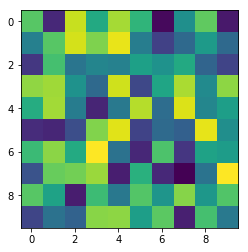

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.rand(50,50)

# broadcasted indices (get a square)
# imshow is like imagesc in matlab
plt.imshow(x[10:20, 10:20])

# list of indices (get *10* numbers not a 10x10)!
print(x[np.arange(10,20,1,int), np.arange(10,20,1,int)])

# if you want to broadcast with a list you can use ix_ but this is SLOW so slices are preferred
plt.imshow(x[np.ix_( np.arange(10,20,1,int), np.arange(10,20,1,int) )])

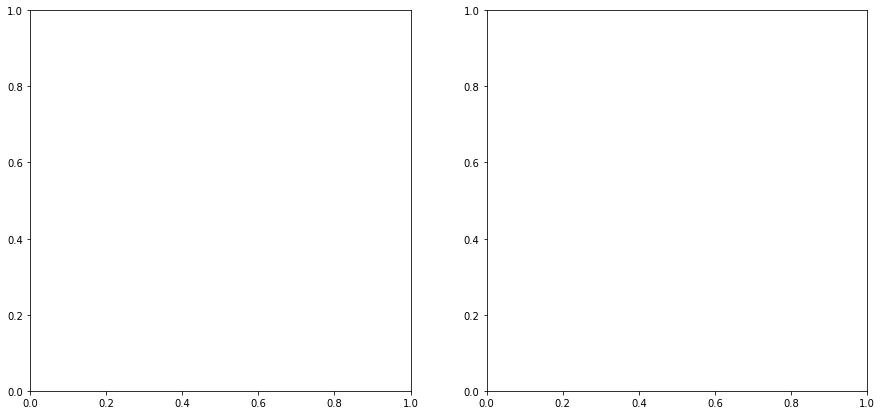

In [7]:
### EXERCISE
# plot these two indexed matrices (which give the same result) in subplots

# make a large plot
fig = plt.figure(figsize=(15,7))

# subplot 1
ax1 = fig.add_subplot(1,2,1)
#ax1.imshow(....)

# subplot 2
ax2 = fig.add_subplot(1,2,2)


Numpy also automatically broadcasts if last N indices are the same (it will add the first index itself). However, if you want to broadcast along the last indices, then you need to add new axes:

In [8]:
x = np.random.rand(50,100)

print(x.shape, x.mean(axis=0).shape, x.mean(axis=1).shape)

# x is 50x100 and x.mean(axis=0) is 100 long (LAST AXIS MATCHES)
x -= x.mean(axis=0)

# x is 50x100 and x.mean(axis=1) is 50 long (LAST AXIS DOES NOT MATCH)
x -= x.mean(axis=1)[:,np.newaxis]

(50, 100) (100,) (50,)


Did you see I did a few other tricky things you can't do in matlab? I did an "inline" operation to subtract, the following are equivalent:

In [9]:
x = x - x.mean(axis=0)
x -= x.mean(axis=0)

### Classes

Also, these numpy vectors/matrices are technically classes that have their OWN functions called methods, which you call with the `.` - this is different from matlab. So you can take the mean either way

In [10]:
xmean1 = x.mean(axis=0)
xmean2 = np.mean(x, axis=0) # more matlab-y way
print(xmean1[:10])
print(xmean2[:10])

[ 5.55111512e-18  1.05471187e-17 -1.94289029e-18 -4.44089210e-18
  1.11022302e-18  5.55111512e-19  1.11022302e-18 -9.99200722e-18
  3.33066907e-18 -2.77555756e-18]
[ 5.55111512e-18  1.05471187e-17 -1.94289029e-18 -4.44089210e-18
  1.11022302e-18  5.55111512e-19  1.11022302e-18 -9.99200722e-18
  3.33066907e-18 -2.77555756e-18]


You can see all the methods of an object with

In [ ]:
dir(x)

In [ ]:
# You can see all the attributes of an object with:

help(x)

### Copying arrays

Another thing to note for numpy matrices is that equal (`=`) does not allocate new memory unless you tell it to. Try the following code:

In [13]:
a = np.arange(0,10,1,int)
b = a
print('original: b[3] = %d'%b[3])
a[3] = 4
print('after changing a: b[3] = %d'%b[3])

original: b[3] = 3
after changing a: b[3] = 4


Changing `a` will change the value of `b`! Use `b = a.copy()` if you want to prevent this. 

In [14]:
### EXERCISE
# use the b = a.copy() command and change a. does b change?

### Print statements

Also, see how I made the print statement with a "%", this is like "fprintf" in matlab/C. There are different commands for different variable types:

In [15]:
print("for integers: %d"%500)
print("for floats: %2.2f"%50.2)
print("for strings: %s"%'hey mathclub!')
print("%s what is %d divided by %2.2f?"%('hey mathclub!', 500, 50.2))

for integers: 500
for floats: 50.20
for strings: hey mathclub!
hey mathclub! what is 500 divided by 50.20?


In [16]:
print("the answer is %2.2f"%(500/50.2))

the answer is 9.96


### Multiplying vectors and matrices

vector `v = np.array([1,-1])`

array `A = np.array([[3,1],[0,2]])`

scalar multiplication with `*`

In [17]:
v = np.array([1,-1])
A = np.array([[3,1],[0,2]])

print(v * 2)

[ 2 -2]


To compute a dot product between two vectors use `np.dot` or `**2.sum()`

In [18]:
print(np.dot(v,v))
# think about why this is the same:
print((v**2).sum())

2
2


To multiply two matrices or a matrix and a vector, use `np.matmul` or `@` (NOT `*`)

In [19]:
v1 = np.matmul(A,v)
v2 = A @ v

print(v1)
print(v2)

[ 2 -2]
[ 2 -2]


Can you find the eigenvalue using element-wise division of v and v1?

In [20]:
### EXERCISE
# what is the eigenvalue of vector v with A

Also compute $\begin{bmatrix} -1 & 2 \\ 2 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ -1 \end{bmatrix}$
and $\begin{bmatrix} -1 & 2 \\ 2 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

In [21]:
### EXERCISE compute the above matrix multiplications

### Loops

"for" statements in python can iterate over anything - lists, numbers, strings. Here's an example for integers 0-9 (using `range(10)`)

In [22]:
vout = v.copy()
for i in range(10):
    vout = np.matmul(A, vout)
print(vout)

[ 1024 -1024]


Why is the output like that? What happened to `v` after being multiplied by `A` so many times? 

As an exercise write a for-loop to populate a vector with the eigenvalue associated with each `vout` above.

In [23]:
### EXERCISE
# lam = np.zeros(10)   #~~~ empty vector of zeros
# for i in range(10):
#    vout = np.matmul(A, vout) #~~~ how much does vout change by?
#    lam[i] = ?

### Other variable types

dictionaries are like "struct" in matlab - they have keys with corresponding values. This is a useful way to save your data because it allows mixing of different variable types (you can save arrays, strings etc and they have their own labels).

To define a dict and see what methods it has:

In [24]:
dat = {'spks': x, 'matrix': A, 'mouse_name': 'fred'}

help(dat)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwarg

The most important method is `.keys()` - this returns the keys of the dict. To access these keys you type in the string as below:

In [25]:
print(dat.keys())

print(dat['matrix'])

dict_keys(['spks', 'matrix', 'mouse_name'])
[[3 1]
 [0 2]]


In [26]:
# save a dictionary
np.save('mydict.npy', dat)

# load a dictionary
datl = np.load('mydict.npy', allow_pickle=True).item()